# Paradoxo do Aniversariante

Qual a probabilidade de duas pessoas fazerem aniversário no mesmo dia em uma sala com **N** pessoas?

*fonte: Wikipedia*

Em teoria das probabilidades, o paradoxo do aniversário afirma que dado um grupo de 23 (ou mais) pessoas escolhidas aleatoriamente, a chance de que duas pessoas terão a mesma data de aniversário é de mais de 50%. Para 57 ou mais pessoas, a probabilidade é maior do que 99%, entretanto, ela não pode ser exatamente 100% exceto que se tenha pelo menos 367 pessoas. Calcular essa probabilidade (e as relacionadas a ela) é o problema do aniversário. A matemática por trás disso tem sido utilizada para executar o ataque do aniversário.

O problema foi apresentado pela primeira vez pelo matemático polonês Richard von Mises. 

Para calcular aproximadamente a probabilidade de que em uma sala com n pessoas, pelo menos duas possuam o mesmo aniversário, desprezamos variações na distribuição, tais como anos bissextos, gêmeos, variações sazonais ou semanais, e assumimos que 365 possíveis aniversários são todos igualmente prováveis. Distribuições de aniversários na realidade não são uniformes uma vez que as datas não são equiprováveis.

É mais fácil calcular a probabilidade p(n) de que todos os n aniversários sejam diferentes. Se n > 365, pelo Princípio da Casa dos Pombos esta probabilidade é 0. Por outro lado, se n ≤ 365, ele é dado por 

<br>
<img src="img/paradoxo_aniversario.png">
<br>

porque a segunda pessoa não pode ter o mesmo aniversário do que o primeiro (364/365), o terceiro não pode ter o mesmo aniversário do que o segundo (363/365), etc.

O evento de pelo menos duas pessoas entre n terem o mesmo aniversário é o complementar de todos n serem diferentes. Consequentemente, sua probabilidade p(n) é

```python
    p(n) = 1 − pc(n)
```

Esta probabilidade ultrapassa 1/2 para n = 23 (com valor aproximado de 50.7%). A seguinte tabela mostra a probabilidade para alguns valores de n (ignorando anos bissextos como descrito anteriormente): 
<br>
<img src="img/paradoxo_aniversario_2.png">
<br>


In [5]:
import random

num_p = int(input("Digite o número de pessoas: "))
num_loops = int(input("Digite o número de repetições: ")) # numero de testes
favoraveis = 0
for _ in range(num_loops):
    ani_dates = [random.randint(1, 366) for _ in range(num_p)] # sortear nova lista de datas (dias) de aniversario
    if(any(ani_dates.count(i) > 1 for i in ani_dates)): # verificar se existe a mesma data (valor) mais do que uma vez na lista
        favoraveis += 1

probs_perc = (favoraveis/num_loops)*100
print('Em {} pessoas e {} testes deram-se que {} vezes em que pelo menos duas pessoas fazem anos no mesmo dia'.format(num_p, num_loops, favoraveis))
print('percentagem(%):', "%.2f" %probs_perc)

Digite o número de pessoas: 10
Digite o número de repetições: 10000
Em 10 pessoas e 10000 testes deram-se que 1163 vezes em que pelo menos duas pessoas fazem anos no mesmo dia
percentagem(%): 11.63


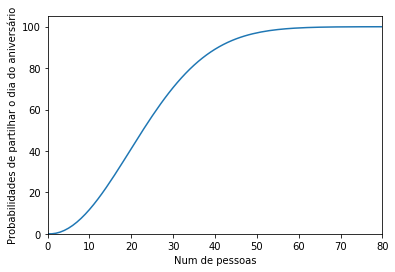

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def birthday_probs(x):
    p = (1.0/365)**x
    for i in range((366-x),366):
        p *= i
    return 1-p

plt.plot([birthday_probs(i)*100 for i in range(366)])
plt.xlabel("Num de pessoas")
plt.ylabel("Probabilidades de partilhar o dia do aniversário")
plt.ylim(ymin=0)
plt.xlim(xmin=0, xmax=80)
plt.show()